<a href="https://colab.research.google.com/github/gongx030/Etv2_limb_manuscript/blob/main/chromVAR_limb_ATAC_seq_new_data_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chromVAR analysis of the limb ATAC-seq with new data to generate figure 3C




Figure 3B and 3C

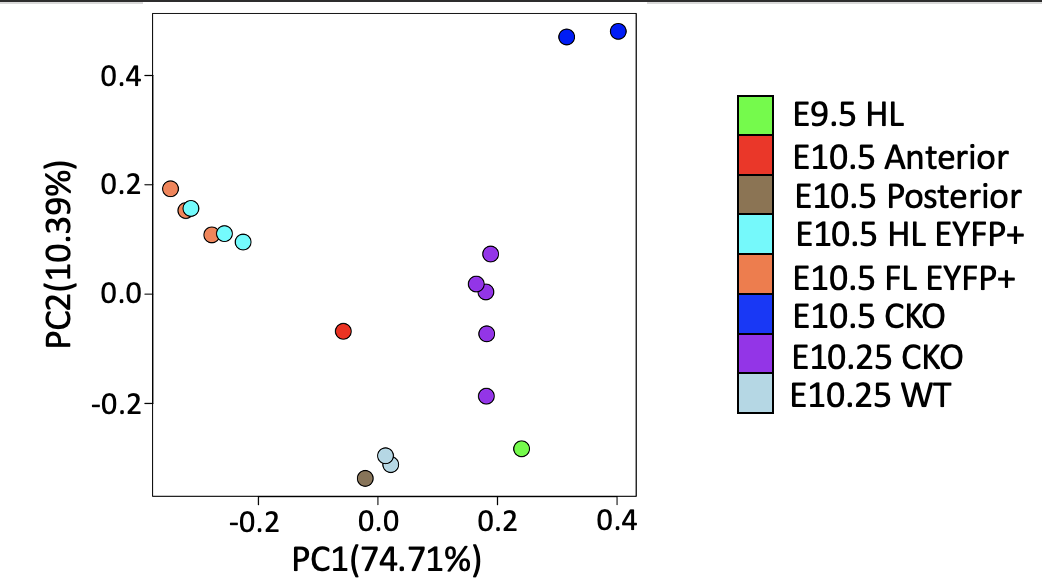

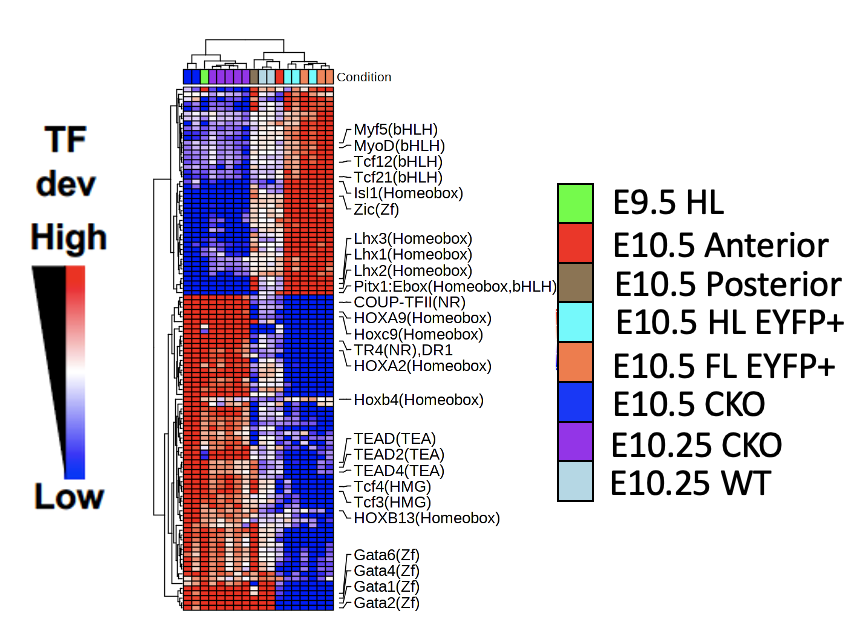

In [ ]:
start_time0 <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 'dplyr', 
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'gsl', 'DirichletMultinomial', 'chromVAR', 'motifmatchr', 'PWMEnrich',
  'DESeq2',
  'pheatmap', 'gplots'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.4 (2021-02-15)

Installing package(s) 'BiocVersion', 'SummarizedExperiment',
  'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel', 'gsl',
  'DirichletMultinomial', 'chromVAR', 'motifmatchr', 'PWMEnrich', 'DESeq2',
  'pheatmap', 'gplots'

also installing the dependencies ‘plyr’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘bit’, ‘GenomicAlignments’, ‘formatR’, ‘reshape2’, ‘poweRlaw’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘bit64’, ‘plogr’, ‘sass’, ‘jquerylib’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘rtracklayer’, ‘lambda.r’, ‘futile.options’, ‘RcppEigen’, ‘CNEr’, ‘RSQLite’, ‘TFMPvalue’, ‘XML’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘data.table’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘bslib’, ‘AnnotationDbi’, ‘annotate’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘Biobase’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘DelayedArray’, ‘BSgenome’, ‘futile.logger’, ‘snow’, ‘nabor’, ‘Biostrings’, ‘TFBSTools’, ‘Rsamtools’, ‘plotly’, ‘shiny’, ‘

### Install `chromVAR` and `chromVARmotifs`

In [ ]:
devtools::install_github("GreenleafLab/chromVARmotifs")

pkgload (1.1.0 -> 1.2.0) [CRAN]
pillar  (1.4.7 -> 1.5.0) [CRAN]
cli     (2.3.0 -> 2.3.1) [CRAN]


Installing 3 packages: pkgload, pillar, cli

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpaqbJRj/remotes4922ab9b04/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("jokergoo/ComplexHeatmap")

iterators    (NA -> 1.0.13  ) [CRAN]
foreach      (NA -> 1.5.1   ) [CRAN]
GlobalOpt... (NA -> 0.1.2   ) [CRAN]
rjson        (NA -> 0.2.20  ) [CRAN]
shape        (NA -> 1.4.5   ) [CRAN]
doParallel   (NA -> 1.0.16  ) [CRAN]
Cairo        (NA -> 1.5-12.2) [CRAN]
clue         (NA -> 0.3-58  ) [CRAN]
GetoptLong   (NA -> 1.0.5   ) [CRAN]
circlize     (NA -> 0.4.12  ) [CRAN]


Installing 10 packages: iterators, foreach, GlobalOptions, rjson, shape, doParallel, Cairo, clue, GetoptLong, circlize

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpaqbJRj/remotes498461cdb/jokergoo-ComplexHeatmap-5a921cc/DESCRIPTION’
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.7.7.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
register(MulticoreParam(2))
library(SummarizedExperiment)
library(dplyr)
library(DESeq2)
library(pheatmap)
library(gplots)
library(ComplexHeatmap)
library(circlize)



Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attac

## Read the metadata file

In [ ]:
remote_meta_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Limb_Metadata.tsv'
local_meta_file <- gsub('https://s3.msi.umn.edu/', './', remote_meta_file)
system(sprintf('wget -x -c -nH %s', remote_meta_file))

In [ ]:
meta <- read.table(local_meta_file, header = TRUE, sep = '\t')
head(meta)

,Name,BAM,BED,BigWig
,<chr>,<chr>,<chr>,<chr>
1,Etv2cKO_10-31-20_S7,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
2,Etv2cKO_11-07-20_S8,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
3,Etv2cKO_11-28-20_S9,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
4,Etv2cKO_12-1-20_S10,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
5,Etv2cKO_12-9-20_S11,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
6,LimbWT_1_12-4-20_S12,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw


In [ ]:
meta <- meta[!grepl('Sall|916-', meta$Name),] ##Only keeping the 25 old and 7 new atac seq data 

### Data filtering and renaming the files to keep the naming consistent with the previous script

In [ ]:
meta_name <- gsub('-|_S[0-9]+', '', meta$Name)


In [ ]:
meta

,Name,BAM,BED,BigWig
,<chr>,<chr>,<chr>,<chr>
1,Etv2cKO_10-31-20_S7,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
2,Etv2cKO_11-07-20_S8,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
3,Etv2cKO_11-28-20_S9,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
4,Etv2cKO_12-1-20_S10,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
5,Etv2cKO_12-9-20_S11,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
6,LimbWT_1_12-4-20_S12,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw
7,LimbWT_2_12-4-20_S13,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_2_12-4-20_S13.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_2_12-4-20_S13.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_2_12-4-20_S13.dedup_treat_pileup.bw
8,748_FL_GFP_neg_S37,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/748_FL_GFP_neg_S37.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/748_FL_GFP_neg_S37.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/748_FL_GFP_neg_S37.dedup_treat_pileup.bw
9,748_FL_GFP_pos_S38,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/748_FL_GFP_pos_S38.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/748_FL_GFP_pos_S38.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/748_FL_GFP_pos_S38.dedup_treat_pileup.bw


In [ ]:
meta_name <- gsub('7[0-9]+_', '', meta_name)
meta_name <- gsub('_[0-9]+', '', meta_name)

In [ ]:
meta_name <- gsub('Etv2_', 'HL_Etv2_', meta_name)
meta_name <- gsub('whole_', '', meta_name)
meta_name <- gsub('ATAC_GFP','Posterior_E10_5',meta_name)
meta_name <- gsub('ATAC_anterior', 'Anterior_E10_5', meta_name)
meta_name <- gsub('ATAC', 'HL_E9_5', meta_name)

In [ ]:
meta_name

[1] "Etv2cKO"             "Etv2cKO"             "Etv2cKO"            
 [4] "Etv2cKO"             "Etv2cKO"             "LimbWT"             
 [7] "LimbWT"              "FL_GFP_neg"          "FL_GFP_pos"         
[10] "HL_GFP_neg"          "HL_GFP_pos"          "HL_Etv2_het"        
[13] "HL_Etv2_CKO"         "HL_Etv2_het"         "HL_Etv2_CKO"        
[16] "HL_Etv2_CKO"         "FL_GFP_neg"          "FL_GFP_pos"         
[19] "HL_GFP_neg"          "HL_GFP_pos"          "FL_GFP_neg"         
[22] "FL_GFP_pos"          "HL_GFP_neg"          "HL_GFP_pos"         
[25] "Etv2CKO_posteriorHL" "Etv2CKO_posteriorHL" "WT_HL"              
[28] "WT_HL"               "Anterior_E10_5"      "HL_E9_5"            
[31] "Posterior_E10_5"     "WT_LPM_NT1"

## Reading bed files to generate a union peak set

In [ ]:
s3_bed <- meta$BED
names(s3_bed) <- meta_name ##using meta data names that were modified

In [ ]:
for (i in 1:length(s3_bed)){
  sprintf('wget -x -c -nH %s', s3_bed[i]) %>% system()
}
s3_bed <- gsub('https://s3.msi.umn.edu/', './', s3_bed)
message(sprintf('all s3_bed exist: %s', all(file.exists(s3_bed))))

all s3_bed exist: TRUE



In [ ]:
gr_list <- lapply(1:length(s3_bed), function(i){
  x <- read.table(s3_bed[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(s3_bed)[i]
  gr
})

In [ ]:
gr <- Reduce('c', gr_list)
gr <- resize(gr, width = 200, fix = 'center')
gr0 <- reduce(gr) 
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]
G <- do.call('cbind', lapply(1:length(s3_bed), function(i) gr %over% gr_list[[i]]))
gr$group <- G
colnames(gr$group) <- names(s3_bed)
gr

GRanges object with 135211 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3191816-3192015      * | /panfs/roc/scratch/d..  11.89920
       [2]     chr1   3400047-3400246      * | /panfs/roc/scratch/d..  13.78180
       [3]     chr1   3647523-3647722      * | /panfs/roc/scratch/d..  14.78840
       [4]     chr1   3649033-3649232      * | /panfs/roc/scratch/d..   5.47637
       [5]     chr1   3651338-3651537      * | /panfs/roc/scratch/d..   9.54477
       ...      ...               ...    ... .                    ...       ...
  [135207]     chrY 90828856-90829055      * | /panfs/roc/scratch/d..  35.17030
  [135208]     chrY 90829716-90829915      * | /panfs/roc/scratch/d..   2.15339
  [135209]     chrY 90835556-90835755      * | /panfs/roc/scratch/d..   8.03207
  [135210]     chrY 90838629-90838828      * | /panfs/roc/scra

In [ ]:
  gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr ##Union peak set

GRanges object with 134677 ranges and 4 metadata columns:
           seqnames              ranges strand |                peak_id
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1     3191816-3192015      * | /panfs/roc/scratch/d..
       [2]     chr1     3400047-3400246      * | /panfs/roc/scratch/d..
       [3]     chr1     3647523-3647722      * | /panfs/roc/scratch/d..
       [4]     chr1     3649033-3649232      * | /panfs/roc/scratch/d..
       [5]     chr1     3651338-3651537      * | /panfs/roc/scratch/d..
       ...      ...                 ...    ... .                    ...
  [134673]     chrX 170859281-170859480      * | /panfs/roc/scratch/d..
  [134674]     chrX 170862187-170862386      * | /panfs/roc/scratch/d..
  [134675]     chrX 170865416-170865615      * | /panfs/roc/scratch/d..
  [134676]     chrX 170867099-170867298      * | /panfs/roc/scratch/d..
  [134677]     chrX 170881030-170881229      * | /panfs/roc/scratch/d..
      

## Downloading bigwig files that would be used to generate summarized experiment

In [ ]:
s3_bw <- meta$BigWig
names(s3_bw) <- meta_name

In [ ]:
for (i in 1:length(s3_bw)){
  sprintf('wget -x -c -nH %s', s3_bw[i]) %>% system()
}
s3_bw <- gsub('https://s3.msi.umn.edu/', './', s3_bw)
message(sprintf('all s3_bw exist: %s', all(file.exists(s3_bw))))

all s3_bw exist: TRUE



In [ ]:
library(rtracklayer)
library(futile.logger)
X <- do.call('cbind', lapply(s3_bw, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = names(s3_bw))

In [ ]:
names(colData(se)) <- 'group'

In [ ]:
colData(se)$Name <- meta$Name

In [ ]:
colData(se)

DataFrame with 32 rows and 2 columns
                          group                  Name
                    <character>           <character>
Etv2cKO                 Etv2cKO   Etv2cKO_10-31-20_S7
Etv2cKO                 Etv2cKO   Etv2cKO_11-07-20_S8
Etv2cKO                 Etv2cKO   Etv2cKO_11-28-20_S9
Etv2cKO                 Etv2cKO   Etv2cKO_12-1-20_S10
Etv2cKO                 Etv2cKO   Etv2cKO_12-9-20_S11
...                         ...                   ...
WT_HL                     WT_HL  WT_whole_HL_905-2_S4
Anterior_E10_5   Anterior_E10_5 ATAC_105_anterior_S31
HL_E9_5                 HL_E9_5           ATAC_95_S30
Posterior_E10_5 Posterior_E10_5      ATAC_105_GFP_S32
WT_LPM_NT1           WT_LPM_NT1         WT_LPM_NT1_S1

## Normalize the read counts by DESeq2
Takes ~ 15 mins

In [ ]:
dds <- DESeqDataSet(se, design = ~ group)
dds <- estimateSizeFactors(dds)
dds <- DESeq(dds)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = ~group):
“134657 duplicate rownames were renamed by adding numbers”
Warning message in DESeqDataSet(se, design = ~group):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



## Prepare peaks for chromVAR analysis

Find  peaks that are differentially expressed between Etv2 CKO and HL GFP+

In [ ]:
res <- as.data.frame(results(dds, contrast = c('group', 'HL_GFP_pos', 'Etv2CKO_posteriorHL')))
j <- !is.na(res[, 'pvalue']) & res[, 'pvalue'] < 0.01 & abs(res[, 'log2FoldChange']) > 1 # 2 FC up in HL GFP+

In [ ]:
sprintf('number of peaks used for chromVAR: %d / %d', sum(j), length(j)) %>% message()

number of peaks used for chromVAR: 10122 / 134677



## chromVAR analysis

In [ ]:
bg <- c(
  'Anterior_E10_5' = 'red',
  'Posterior_E10_5' = 'burlywood4',
  'Etv2CKO_posteriorHL' = 'blue',
# 'WT_HL' = 'lightblue',
# 'FL_GFP_neg' = 'yellow',
  'FL_GFP_pos' = 'coral',
  'HL_E9_5' = 'green',
# 'WT_LPM_NT1' = 'green',
# 'HL_Etv2_CKO' = 'black',
# 'HL_Etv2_het' = 'gray',
# 'HL_GFP_neg' = 'purple',
  'HL_GFP_pos' = 'cyan',
  'Etv2cKO' = 'purple',
  'LimbWT' = 'lightblue'
)

In [ ]:
motif.set <- 'homer_pwms'
se2 <- se[j, colData(se)[['group']] %in% names(bg)]
motif_ix <- matchMotifs(get(motif.set), rowRanges(se2), genome = 'mm10')
se2 <- addGCBias(se2, genome = BSgenome.Mmusculus.UCSC.mm10)
dev <- computeDeviations(object = se2, annotations = motif_ix)
v <- computeVariability(dev)

### PCA 

In [ ]:
colData(se2)[['group']]

[1] "Etv2cKO"             "Etv2cKO"             "Etv2cKO"            
 [4] "Etv2cKO"             "Etv2cKO"             "LimbWT"             
 [7] "LimbWT"              "FL_GFP_pos"          "HL_GFP_pos"         
[10] "FL_GFP_pos"          "HL_GFP_pos"          "FL_GFP_pos"         
[13] "HL_GFP_pos"          "Etv2CKO_posteriorHL" "Etv2CKO_posteriorHL"
[16] "Anterior_E10_5"      "HL_E9_5"             "Posterior_E10_5"

In [ ]:
colData(se2)[['Name']]

[1] "Etv2cKO_10-31-20_S7"        "Etv2cKO_11-07-20_S8"       
 [3] "Etv2cKO_11-28-20_S9"        "Etv2cKO_12-1-20_S10"       
 [5] "Etv2cKO_12-9-20_S11"        "LimbWT_1_12-4-20_S12"      
 [7] "LimbWT_2_12-4-20_S13"       "748_FL_GFP_pos_S38"        
 [9] "748_HL_GFP_pos_S40"         "753_FL_GFP_pos_S47"        
[11] "753_HL_GFP_pos_S49"         "758_FL_GFP_pos_S51"        
[13] "758_HL_GFP_pos_S53"         "Etv2CKO_posteriorHL_902_S1"
[15] "Etv2CKO_posteriorHL_904_S2" "ATAC_105_anterior_S31"     
[17] "ATAC_95_S30"                "ATAC_105_GFP_S32"

[1] 7.495561e-01 1.024309e-01 3.520526e-02 2.826526e-02 2.147395e-02
 [6] 1.569321e-02 1.228234e-02 7.742131e-03 6.592266e-03 3.995666e-03
[11] 3.718051e-03 3.295826e-03 2.865438e-03 2.301432e-03 1.998460e-03
[16] 1.522372e-03 1.061390e-03 2.405544e-29

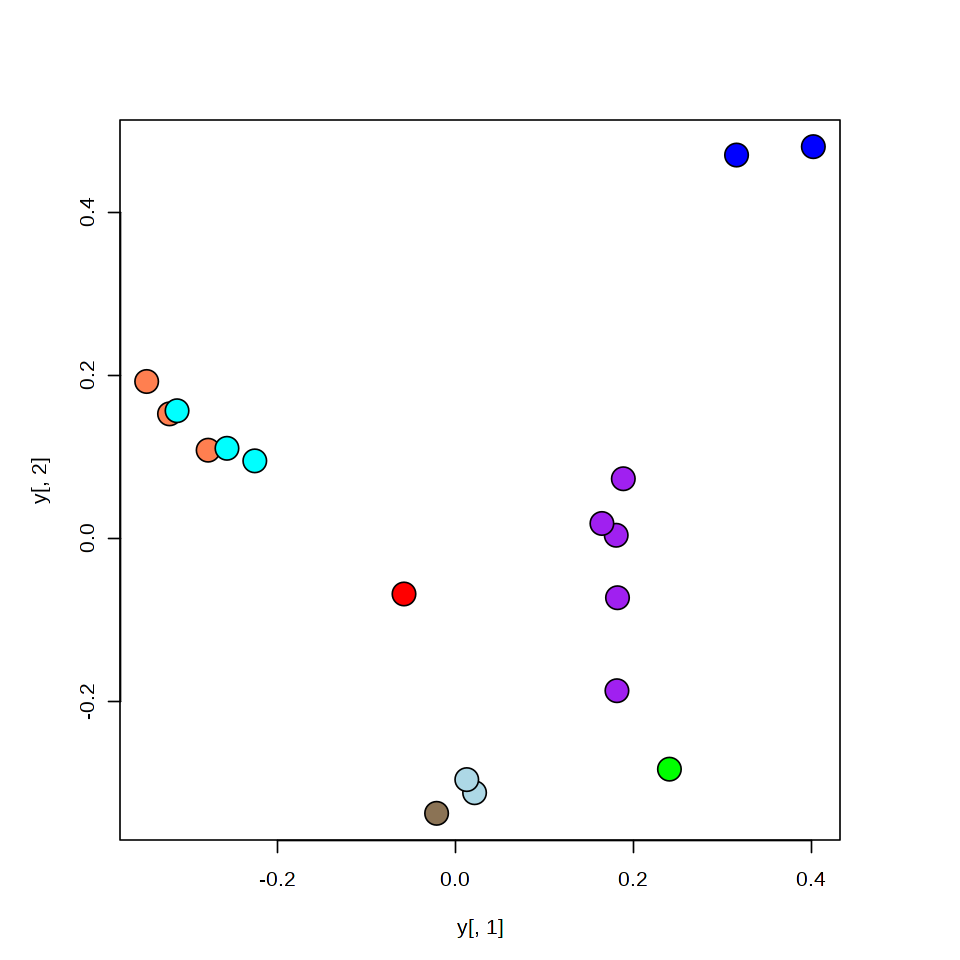

In [ ]:
set.seed(2345)
s <- svd(assay(dev))
y <- s$v
col <- rep('black', length(bg)); names(col) <- names(bg)
par(mar = c(5, 5, 5, 5))
plot(y[, 1], y[, 2], pch = 21, bg = bg[colData(se2)[['group']]], cex = 2.5, col = col[colData(se2)[['group']]])
s$d^2 / sum(s$d^2)

[1] 7.495561e-01 1.024309e-01 3.520526e-02 2.826526e-02 2.147395e-02
 [6] 1.569321e-02 1.228234e-02 7.742131e-03 6.592266e-03 3.995666e-03
[11] 3.718051e-03 3.295826e-03 2.865438e-03 2.301432e-03 1.998460e-03
[16] 1.522372e-03 1.061390e-03 2.405544e-29

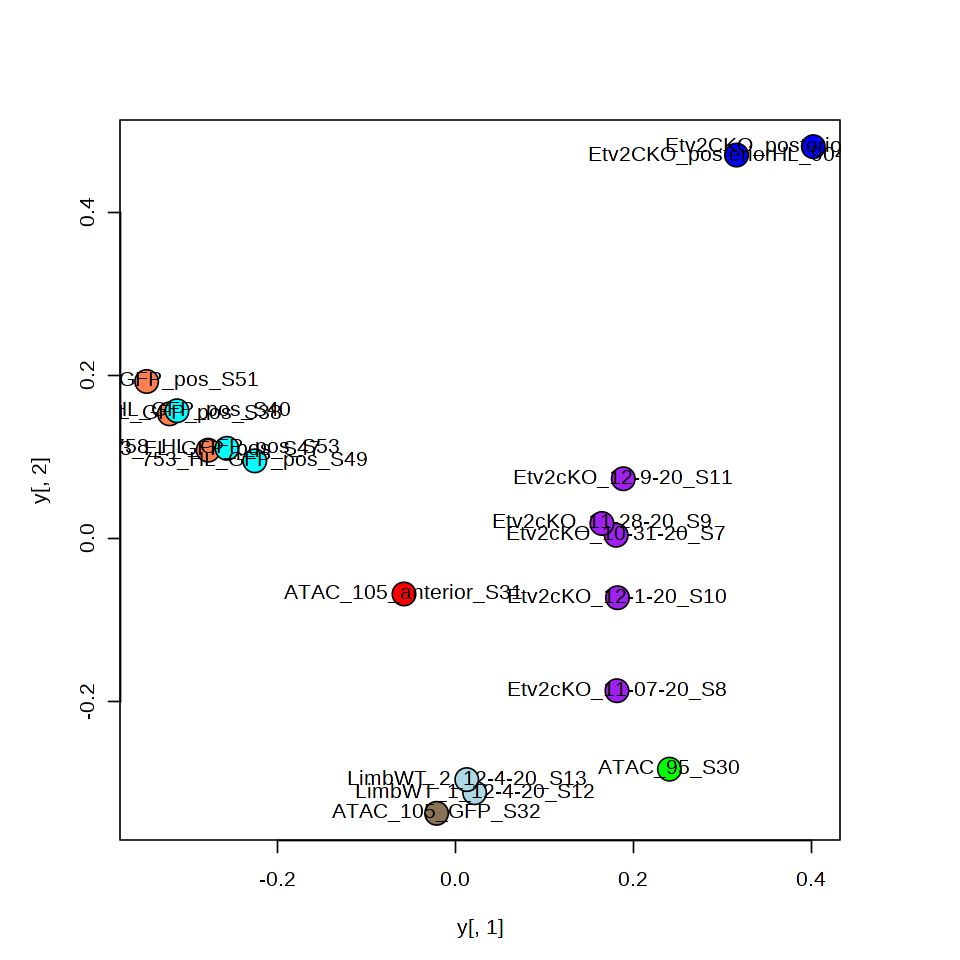

In [ ]:
s <- svd(assay(dev))
y <- s$v
col <- rep('black', length(bg)); names(col) <- names(bg)
par(mar = c(5, 5, 5, 5))
plot(y[, 1], y[, 2], pch = 21, bg = bg[colData(se2)[['group']]],  cex = 2.5, col = col[colData(se2)[['group']]]) 
text(y[,1], y[,2],colData(se2)[['Name']])
s$d^2 / sum(s$d^2)

### Complex Heatmap

In [ ]:
Z <- assay(dev)
rownames(Z) <- v[, 'name']
Z <- Z[v[, 'p_value'] < 1e-10, ]

In [ ]:
terms <- rownames(Z)[grepl('Isl|Gata|Lhx|TEAD|Tcf|HOX|Zic|MyoD|Myf|Et|Hox|Pitx|COUP|TR4', rownames(Z))] ##higlighting genes in the paper

In [ ]:
terms 

[1] "COUP-TFII(NR)"             "Gata2(Zf)"                
 [3] "Gata4(Zf)"                 "Gata6(Zf)"                
 [5] "Gata1(Zf)"                 "HOXA2(Homeobox)"          
 [7] "HOXA9(Homeobox)"           "HOXB13(Homeobox)"         
 [9] "Hoxb4(Homeobox)"           "Hoxc9(Homeobox)"          
[11] "Isl1(Homeobox)"            "Lhx1(Homeobox)"           
[13] "Lhx2(Homeobox)"            "Lhx3(Homeobox)"           
[15] "Myf5(bHLH)"                "MyoD(bHLH)"               
[17] "Pitx1:Ebox(Homeobox,bHLH)" "Tcf12(bHLH)"              
[19] "Tcf21(bHLH)"               "Tcf3(HMG)"                
[21] "Tcf4(HMG)"                 "TEAD2(TEA)"               
[23] "TEAD4(TEA)"                "TEAD(TEA)"                
[25] "TR4(NR),DR1"               "Zic(Zf)"

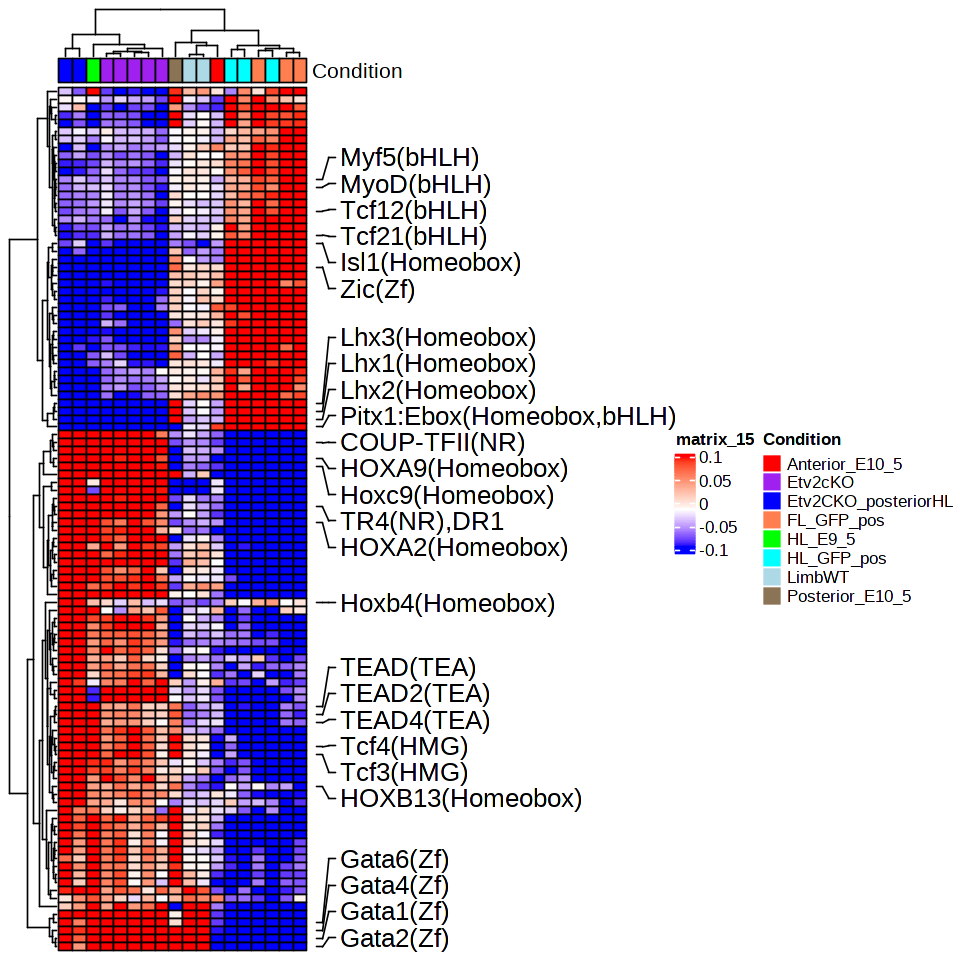

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(Z),
  col = list(Condition = bg),
  gp = gpar(col = "black")
)

col_fun <- colorRamp2(quantile(Z, c(0.25, 0.5, 0.75)), c("blue", "white", "red"))

options(repr.plot.width=8, repr.plot.height = 8)
Heatmap(
  Z,
  cluster_rows = TRUE,
  cluster_columns = TRUE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = TRUE,
  col = col_fun,
  show_row_dend = TRUE,
  rect_gp = gpar(col = "black", lwd = 1),
  row_names_gp = gpar(fontsize = 15)) +
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(Z) %in% terms), 
      labels = rownames(Z)[rownames(Z) %in% terms], 
      labels_gp = gpar(fontsize = 15), 
      padding = unit(1, "mm"), 
      which = 'row'
    ) 
  )

In [ ]:
sessionInfo()

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] futile.logger_1.4.3                circlize_0.4.12                   
 [3] ComplexHeatmap_2.7.7               gplots_3.1.1                      
 [5] pheatmap_1.0.12                    DESeq2_1.30.1                     
 [7] dply

In [ ]:
Sys.time() - start_time0

Time difference of 56.15364 mins